In [19]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [20]:
img=os.path.join(os.path.abspath("images"),"cats")
img

'e:\\Machine Learning\\Image Classification\\Tutorial_1\\images\\cats'

In [21]:
os.listdir(img)[0]

'cat1.jpeg'

In [22]:
os.path.join(img,os.listdir(img)[0])

'e:\\Machine Learning\\Image Classification\\Tutorial_1\\images\\cats\\cat1.jpeg'

images\dogs\dog1.jpeg
Converted Image to Array:  [[0.02352941 0.02352941 0.02352941 ... 0.07843137 0.0745098  0.07058824]
 [0.01960784 0.01960784 0.01960784 ... 0.09803922 0.09411765 0.09411765]
 [0.01568627 0.01568627 0.01960784 ... 0.10980392 0.10588235 0.10196078]
 ...
 [0.39607843 0.39607843 0.39607843 ... 0.25882353 0.25098039 0.23921569]
 [0.37647059 0.37254902 0.36862745 ... 0.25098039 0.23529412 0.21568627]
 [0.37254902 0.36470588 0.35686275 ... 0.24705882 0.23137255 0.20784314]]
Array size : 64 x 64=  22500


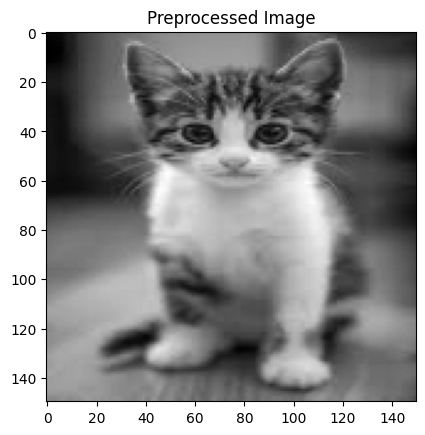

In [23]:
# Folder path (Update with your dataset path)
dataset_path = "images"
categories = ["cats", "dogs"]  # Example categories

# Function to preprocess images
def preprocess_image(image_path):
    image = cv2.imread(image_path)  # Read image
    image = cv2.resize(image, (150, 150))  # Resize to 64x64
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    norm_image = gray_image / 255.0  # Normalize (0-1 range)
    return norm_image

# Display a sample cat image
sample_image_path = os.path.join(img,os.listdir(img)[0])
# os.listdir(os.path.join(dataset_path, "cats"))[0] gives the first 
sample_image = preprocess_image(sample_image_path)

sample_image2_path = os.path.join(dataset_path, "dogs", os.listdir(os.path.join(dataset_path, "dogs"))[0])
print(sample_image2_path)
sample_image2 = preprocess_image(sample_image2_path)
print("Converted Image to Array: ",sample_image)
print("Array size : 64 x 64= ",sample_image.size)
#Plotting the Array with color map to see the image
plt.imshow(sample_image, cmap="gray")
plt.title("Preprocessed Image")
plt.show()


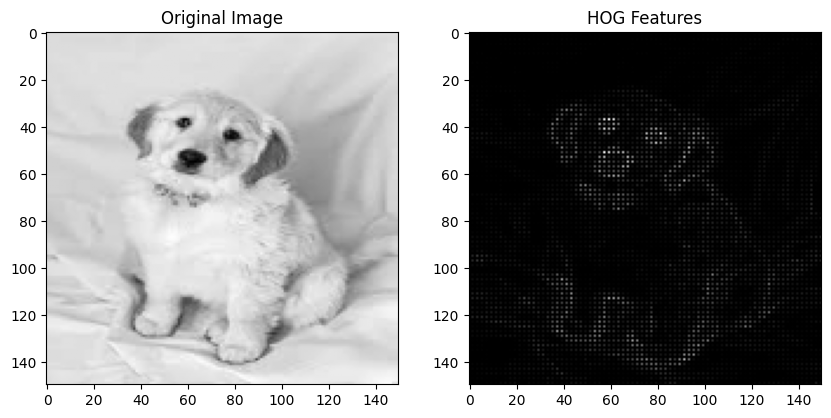

In [24]:
# Function to extract HOG features
def extract_hog_features(image):
    features, hog_image = hog(image, pixels_per_cell=(2, 2), 
                              cells_per_block=(2, 2),orientations=9,  visualize=True)
    return features, hog_image

# Extract HOG features from an example image
hog_features, hog_image = extract_hog_features(sample_image2)

# Display original and HOG-transformed image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(sample_image2, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(hog_image, cmap="gray")
ax[1].set_title("HOG Features")
plt.show()


In [25]:
data = []
labels = []

for category in categories:
    folder = os.path.join(dataset_path, category)
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        preprocessed_img = preprocess_image(file_path)
        features, _ = extract_hog_features(preprocessed_img)
        data.append(features)
        labels.append(category)

# Convert to NumPy arrays
X = np.array(data)
y = np.array(labels)

# Encode labels (e.g., 'cat' → 0, 'dog' → 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("Data Shape:", X.shape)
print("Labels:", np.unique(y))


Data Shape: (47, 197136)
Labels: [0 1]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(y_train)}")
print(f"Testing samples: {len(y_test)}")


Training samples: 37
Testing samples: 10


In [27]:
# Train an SVM classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 70.00%


In [28]:
def predict_image(image_path):
    image = preprocess_image(image_path)
    features, _ = extract_hog_features(image)
    features = np.array(features).reshape(1, -1)
    
    prediction = knn.predict(features)
    label = label_encoder.inverse_transform(prediction)
    print(f"Predicted label: {label[0]}")

# Test on a new image
for i in range(1,10):
    test_image_path = f"images/cats/cat{i}.jpeg"  # Change path accordingly
    print(f"Cat {i} - ")
    predict_image(test_image_path)


Cat 1 - 


Predicted label: cats
Cat 2 - 
Predicted label: cats
Cat 3 - 
Predicted label: cats
Cat 4 - 
Predicted label: cats
Cat 5 - 
Predicted label: cats
Cat 6 - 
Predicted label: cats
Cat 7 - 
Predicted label: cats
Cat 8 - 
Predicted label: cats
Cat 9 - 
Predicted label: cats
